## Sử dụng mạng Neural Network để phân loại dữ liệu hình ảnh

Trong bài này chúng ta hãy cùng xây dựng một mô hình đầu tiên, bao gồm các bước:
- Chuẩn bị dữ liệu
- Chuẩn hóa dữ liệu
- Xây dựng mô hình
- Tiến hành đào tạo (training)
- Đánh giá mô hình
- Nâng cấp mô hình

### I. Tập dữ liệu

In [6]:
!nvidia-smi

Fri Jun 24 12:48:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


Bộ dữ liệu [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) bao gồm 70000 ngàn ảnh với 10 nhãn. Mỗi ảnh có kích cỡ $28 \times 28$ 

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Tải dữ liệu

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

`json file`

Danh sách các nhãn

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Bộ dữ liệu để training gồm 60000 ảnh tương ứng với nhãn

In [10]:
# train_images[as]

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
train_labels[1]

0

Bộ dữ liệu để validation/test gồm 10000 ảnh tương ứng với nhãn

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(test_labels)

10000

## II. Chuẩn hóa hình ảnh

Để tránh hiện tượng giá trị hàm mất mát quá lớn hoặc quá nhỏ nằm ngoài khả năng lưu trữ của máy tính, trong thực tế việc làm các giá trị pixel trong ảnh nhỏ trong đoạn $[0, 1]$ là cần thiết.

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0

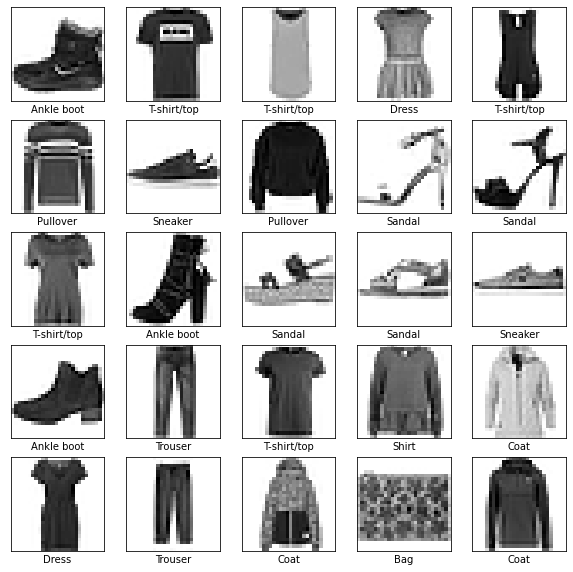

In [16]:
#@title Hiển thị một số hình ảnh
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### III. Xây dựng mô hình

Mô hình gồm 3 lớp
- Lớp 1: Duỗi ảnh từ ma trận thành vector
- Lớp 2: Lớp nơ ron đầy đủ với 128 nơ ron
- Lớp 3: Lớp nơ ron đầy đủ với 10 nơ ron

(60000, 28, 28) = (60000, 784)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax')
])

Đầu ra của mô hình có số lượng phần tử bằng số nhãn.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [19]:
[
 0.01,
 0.1,
 0.8,
 ...

]

1

1

### IV. Hàm mất mát + Thuật toán tối ưu

crossentropy

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### V. Tiến hành training

Độ chính xác thể hiện tỉ lệ dự đoán các ảnh trên tập train.

In [21]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5972 - accuracy: 0.8002
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4612 - accuracy: 0.8429
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4345 - accuracy: 0.8509
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4203 - accuracy: 0.8552
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4139 - accuracy: 0.8570
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4060 - accuracy: 0.8594
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4017 - accuracy: 0.8609
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3982 - accuracy: 0.8608
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3943 - accuracy: 0.8636
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.392

Trong thực tế, ta sẽ sử dụng tập không được train để validation để tránh hiện tượng học tủ (overfitting)

Bạn có thể nhận thấy khi kiểm tra độ chính xác trên tập không được train, thường giá trị này sẽ nhỏ hơn. Đây là chỉ số quan trọng chúng ta cần quan tâm.

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

### VI. Tiến hành dự đoán (Inference)

Quá trình này là khi đưa mô hình vào thực tế, ta sử dụng một ảnh **hoàn toàn không có nhãn** để dự đoán.

In [23]:
img = test_images[1]

print(img.shape)

(28, 28)


In [24]:
# Tăng chiều để phù hợp với mô hình
img = (np.expand_dims(img,0))

print(img.shape)

# (60000, 28, 28)

(1, 28, 28)


In [25]:
prob = model.predict(img)

In [26]:
prob

array([[1.2873321e-04, 1.8102055e-07, 9.6124232e-01, 1.6747781e-07,
        5.1871999e-03, 4.9377839e-20, 3.3430647e-02, 1.9062115e-30,
        1.0822518e-05, 1.3999470e-19]], dtype=float32)

In [27]:
#@title Các hàm bổ sung
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [28]:
predictions = model.predict(test_images)

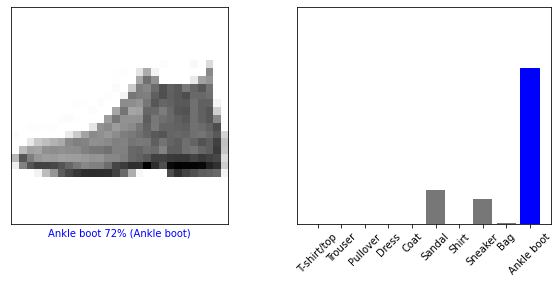

In [29]:
#@title Hiển thị kết quả dự đoán trên một ảnh
i = 0
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
predictions

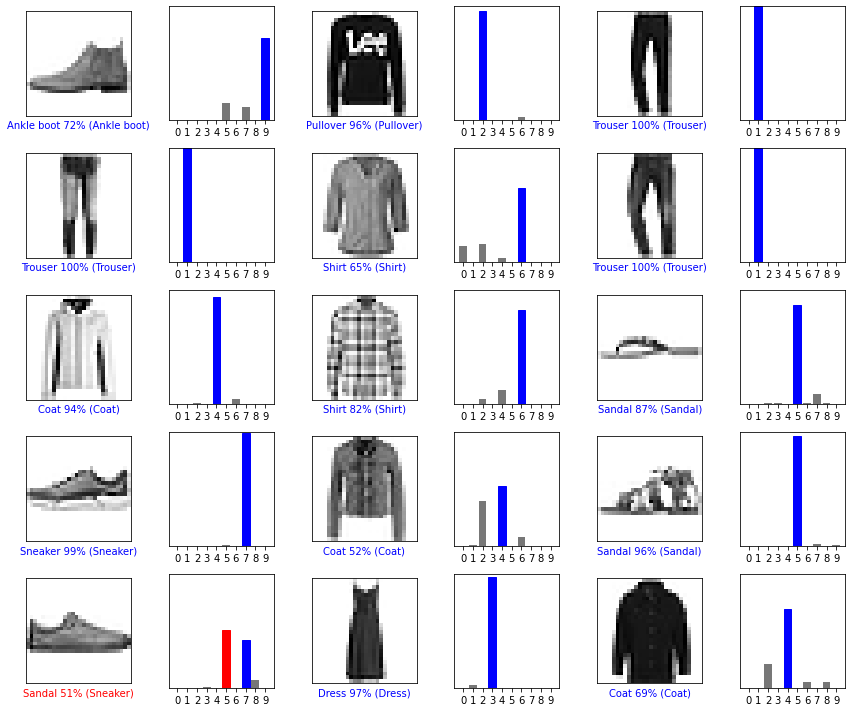

In [30]:
#@title Hiển thị kết quả dự đoán trên nhiều ảnh
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

- Màu xanh: Dự đoán đúng
- Màu đỏ: Dự đoán sai

### VI. Nâng cấp mô hình

Vậy là bạn đã có thể hiểu được một quy trình đơn giản để xây dựng một mô hình phân loại ảnh.

Công việc tiếp theo là chúng ta sẽ nghiên cứu cách cải thiện độ chính xác của mô hình và quá trình này sẽ không bao giờ dừng lại.

Cách 1: Bổ sung các lớp Nơ ron

In [ ]:
big_nn_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

big_nn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

big_nn_model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Một nhận xét nho nhỏ: Mặc dù gia tăng độ phức tạp của mô hình tuy nhiên vẫn chưa nhận ra được nhiều sự cải thiện đáng kể từ mô hình thuần Nơ ron.

Cách 2: Bổ sung các lớp trích xuất đặc trưng

In [ ]:
new_train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
new_test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
	  tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

cnn_model.fit(new_train_images, train_labels, epochs=20, validation_data=(new_test_images, test_labels))

Khi sử dụng thêm các lớp xử lý hình ảnh để trích xuất đặc trưng ta nhận thấy có sự cải thiện từ phương pháp này.

Chúc mừng bạn đã training được mô hình AI đầu tiên :)